# Thompson Sampling Algorithm

- wehre we think the actual value will be "muo star M*" **"probabilistic"**
- on other hand UCB is a **"determenistic"** where everything was strict. There's no randomness in algorithm itself.
- We are not trying to guess the distribution behind these machines

<img src="13.png">
<img src="12.png">

## Tasks

#### We want to find the ad with the highest conversion rate.

#### The ad in which the users click the most.

### Import Relevant Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Dataset

In [3]:
dataset = pd.read_csv("Ads_CTR_optimisation.csv")

In [4]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing Thompson Sampling Algorithm

**The ad that we show online had a fixed conversion rate because it will convert over time for the same rate of people**

In [36]:
import random ## for random generate each time a random point
N = 500 ## number of observations
d = 10 ## number of ads
ads_selected = []
numbers_of_rewards_1 = [0] * d ## will intialize a list with 10 zeros ---> N
numbers_of_rewards_0 = [0] * d ## will intialize a list with 10 zeros ---> N
total_reward = 0
for n in range(0, N):
        ad = 0
        max_random = 0 ## will replace maximum ucb to apply the step number 3 in algorithm (will act now as a store)
        for i in range(0, d):
            random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
            ## the trick now is to keep in memory the maximum of run draws has to run through all of this for loop
            if random_beta > max_random:
                max_random = random_beta ## to continuly update the random
                ad = i
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        if reward == 1:
            numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
        else:
            numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        total_reward = total_reward + reward

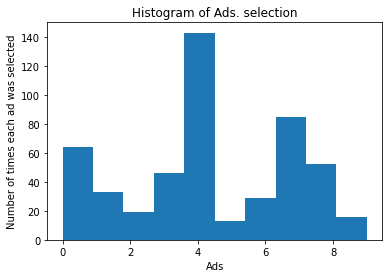

In [37]:
plt.hist(ads_selected)
plt.title("Histogram of Ads. selection")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()